In [1]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.impute import SimpleImputer
from scipy import stats


In [62]:
Data = pd.read_csv(r"D:/DataScienceProject\Project-III_Forest_Cover _Classification\covertype.csv")

In [63]:
Data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Aspen
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Aspen
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Lodgepole Pine
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Lodgepole Pine
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Aspen


In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145890 entries, 0 to 145889
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Elevation                           145890 non-null  int64 
 1   Aspect                              145890 non-null  int64 
 2   Slope                               145890 non-null  int64 
 3   Horizontal_Distance_To_Hydrology    145890 non-null  int64 
 4   Vertical_Distance_To_Hydrology      145890 non-null  int64 
 5   Horizontal_Distance_To_Roadways     145890 non-null  int64 
 6   Hillshade_9am                       145890 non-null  int64 
 7   Hillshade_Noon                      145890 non-null  int64 
 8   Hillshade_3pm                       145890 non-null  int64 
 9   Horizontal_Distance_To_Fire_Points  145890 non-null  int64 
 10  Wilderness_Area_1                   145890 non-null  int64 
 11  Wilderness_Area_2                   145

In [7]:
Data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
count,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,...,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000
mean,2874.458949,141.127418,11.925574,251.824738,34.554322,3313.827541,217.368106,224.874748,139.788203,3044.958105,...,0.002276,0.004730,0.004222,0.000151,0.000699,0.000069,0.000233,0.005504,0.008294,0.005045
std,210.801279,107.719296,6.319326,192.473899,41.215776,1687.779953,21.590298,16.084851,31.311690,1761.882341,...,0.047650,0.068609,0.064843,0.012279,0.026432,0.008279,0.015264,0.073986,0.090693,0.070848
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2747.000000,54.000000,7.000000,95.000000,7.000000,1848.000000,207.000000,216.000000,121.000000,1608.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2909.000000,108.000000,11.000000,212.000000,23.000000,3420.000000,222.000000,226.000000,140.000000,2713.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3004.000000,217.000000,15.000000,362.000000,51.000000,4673.000000,232.000000,236.000000,159.000000,4478.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3849.000000,360.000000,61.000000,1343.000000,554.000000,7117.000000,254.000000,254.000000,248.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


DataCleaning

Checking Missing Value and Duplicate checking

In [13]:
duplicate_count = Data.duplicated().sum()
print(f"Number of duplicate records: {duplicate_count}")
missing_values = Data.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Number of duplicate records: 0
Missing values in each column:
Series([], dtype: int64)


handle outliers using IQR method for numeric features

In [18]:
cols_to_check = [
    'Elevation', 'Aspect', 'Slope',
    'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

# IQR method to cap outliers
for col in cols_to_check:
    Q1 = Data[col].quantile(0.25)
    Q3 = Data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Cap the outliers
    Data[col] = np.where(Data[col] < lower, lower,
                 np.where(Data[col] > upper, upper, Data[col]))

print("Outliers handled successfully using IQR capping!")


Outliers handled successfully using IQR capping!


Elevation                                Axes(0.125,0.747241;0.352273x0.132759)
Aspect                                Axes(0.547727,0.747241;0.352273x0.132759)
Slope                                    Axes(0.125,0.587931;0.352273x0.132759)
Horizontal_Distance_To_Hydrology      Axes(0.547727,0.587931;0.352273x0.132759)
Vertical_Distance_To_Hydrology           Axes(0.125,0.428621;0.352273x0.132759)
Horizontal_Distance_To_Roadways       Axes(0.547727,0.428621;0.352273x0.132759)
Hillshade_9am                             Axes(0.125,0.26931;0.352273x0.132759)
Hillshade_Noon                         Axes(0.547727,0.26931;0.352273x0.132759)
Hillshade_3pm                                Axes(0.125,0.11;0.352273x0.132759)
Horizontal_Distance_To_Fire_Points        Axes(0.547727,0.11;0.352273x0.132759)
dtype: object

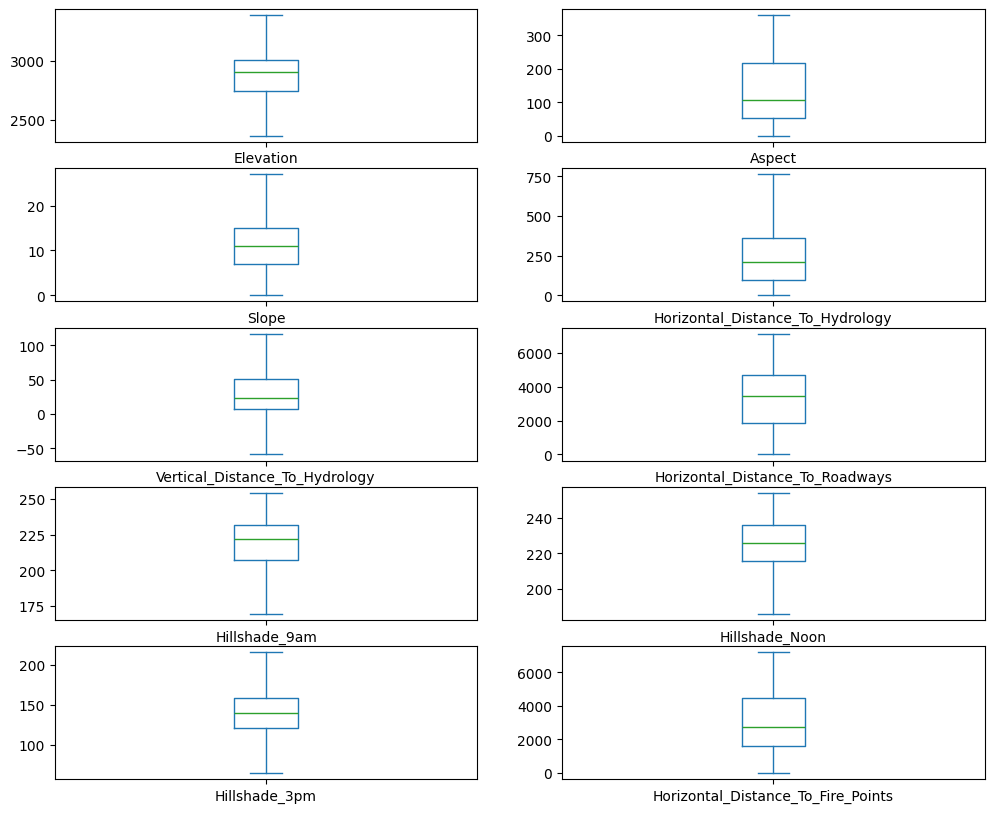

In [20]:
Data[['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']].plot(kind='box', subplots=True, layout=(5,2), figsize=(12,10), sharex=False, sharey=False)

Skweness

In [26]:
Data[['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']].skew().sort_values(ascending=False)

Vertical_Distance_To_Hydrology        0.861265
Horizontal_Distance_To_Hydrology      0.792349
Aspect                                0.689432
Slope                                 0.621361
Horizontal_Distance_To_Fire_Points    0.365249
Hillshade_3pm                        -0.001189
Horizontal_Distance_To_Roadways      -0.058240
Elevation                            -0.340370
Hillshade_Noon                       -0.505363
Hillshade_9am                        -0.740409
dtype: float64

Label Encodeing

In [39]:
from sklearn.preprocessing import LabelEncoder
Data['Cover_Type'] = LabelEncoder().fit_transform(Data['Cover_Type'])
Data.to_pickle('processed_data.pkl')

In [40]:
Data = pd.read_pickle('processed_data.pkl')

Class Imbalance Handling

After RandomOverSampler:
 Counter({'Lodgepole Pine': 82457, 'Ponderosa Pine': 82457, 'Cottonwood/Willow': 82457, 'Spruce/Fir': 82457, 'Krummholz': 82457, 'Aspen': 82457, 'Douglas-fir': 82457})


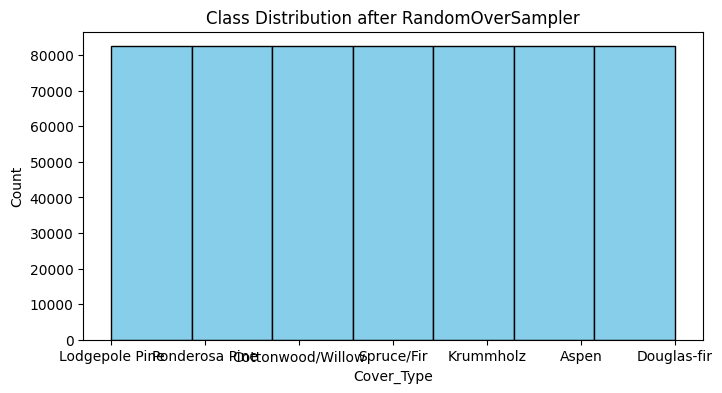

After SMOTE:
 Counter({'Lodgepole Pine': 82457, 'Ponderosa Pine': 82457, 'Cottonwood/Willow': 82457, 'Spruce/Fir': 82457, 'Krummholz': 82457, 'Aspen': 82457, 'Douglas-fir': 82457})


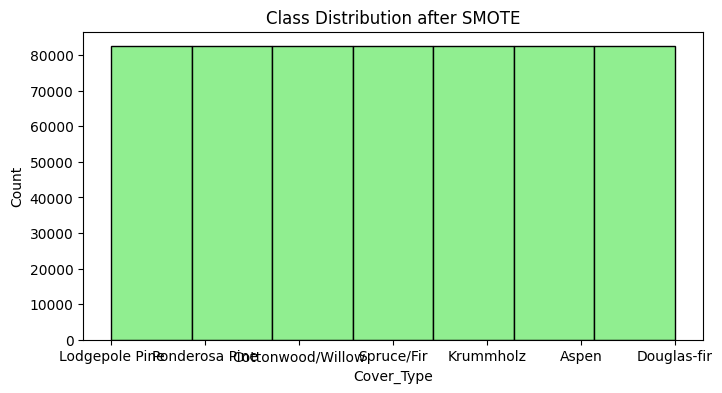

In [47]:
# Split features and target
X = Data.drop(columns=['Cover_Type'])
y = Data['Cover_Type']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# RandomOverSampler
X_train_ros, y_train_ros = RandomOverSampler(random_state=42).fit_resample(X_train, y_train)
print("After RandomOverSampler:\n", Counter(y_train_ros))

plt.figure(figsize=(8,4))
plt.hist(y_train_ros, bins=len(set(y_train_ros)), color='skyblue', edgecolor='black')
plt.title("Class Distribution after RandomOverSampler")
plt.xlabel("Cover_Type")
plt.ylabel("Count")
plt.show()

# SMOTE
X_train_sm, y_train_sm = SMOTE(random_state=42).fit_resample(X_train, y_train)
print("After SMOTE:\n", Counter(y_train_sm))

plt.figure(figsize=(8,4))
plt.hist(y_train_sm, bins=len(set(y_train_sm)), color='lightgreen', edgecolor='black')
plt.title("Class Distribution after SMOTE")
plt.xlabel("Cover_Type")
plt.ylabel("Count")
plt.show()


MODEL BUILDING

In [48]:

# Train Decision Tree on resampled data
y_pred_dt = DecisionTreeClassifier(random_state=42).fit(X_train_res, y_train_res).predict(X_test)

# Evaluate
print("✅ Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


✅ Decision Tree Accuracy: 0.9374528754541093

Classification Report:
                    precision    recall  f1-score   support

            Aspen       0.84      0.86      0.85       614
Cottonwood/Willow       0.92      0.92      0.92       432
      Douglas-fir       0.77      0.77      0.77       432
        Krummholz       0.91      0.93      0.92       432
   Lodgepole Pine       0.96      0.97      0.96     20614
   Ponderosa Pine       0.75      0.73      0.74       432
       Spruce/Fir       0.89      0.88      0.89      6222

         accuracy                           0.94     29178
        macro avg       0.86      0.87      0.86     29178
     weighted avg       0.94      0.94      0.94     29178



In [67]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train
rf_model.fit(X_train_res, y_train_res)  # use resampled training data

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9527040921242032

Classification Report:
                    precision    recall  f1-score   support

            Aspen       0.90      0.88      0.89       614
Cottonwood/Willow       0.95      0.96      0.95       432
      Douglas-fir       0.83      0.87      0.85       432
        Krummholz       0.94      0.96      0.95       432
   Lodgepole Pine       0.97      0.98      0.97     20614
   Ponderosa Pine       0.84      0.85      0.85       432
       Spruce/Fir       0.92      0.90      0.91      6222

         accuracy                           0.95     29178
        macro avg       0.91      0.91      0.91     29178
     weighted avg       0.95      0.95      0.95     29178



Accuracy: 0.6608060867777092
                   precision    recall  f1-score   support

            Aspen       0.13      0.77      0.22       614
Cottonwood/Willow       0.82      0.85      0.83       432
      Douglas-fir       0.62      0.66      0.64       432
        Krummholz       0.73      0.97      0.83       432
   Lodgepole Pine       0.89      0.65      0.75     20614
   Ponderosa Pine       0.62      0.62      0.62       432
       Spruce/Fir       0.49      0.67      0.56      6222

         accuracy                           0.66     29178
        macro avg       0.61      0.74      0.64     29178
     weighted avg       0.77      0.66      0.70     29178



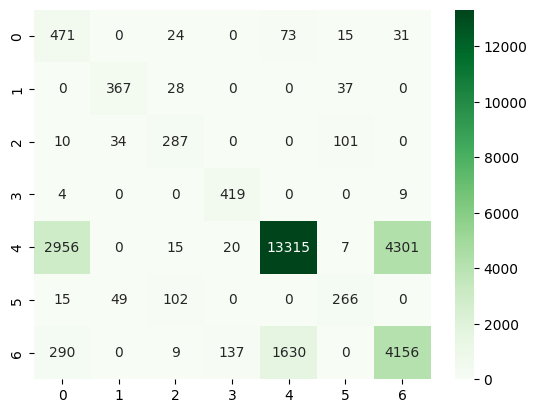

In [51]:
#Logic regression
# Train and predict in one go
y_pred_lr = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(max_iter=1000, random_state=42))])\
            .fit(X_train_res, y_train_res).predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Greens')
plt.show()


KNN Accuracy: 0.9507162930975392
                   precision    recall  f1-score   support

            Aspen       0.77      0.96      0.86       614
Cottonwood/Willow       0.92      0.96      0.94       432
      Douglas-fir       0.85      0.88      0.87       432
        Krummholz       0.89      0.97      0.93       432
   Lodgepole Pine       0.99      0.95      0.97     20614
   Ponderosa Pine       0.88      0.83      0.85       432
       Spruce/Fir       0.87      0.96      0.92      6222

         accuracy                           0.95     29178
        macro avg       0.88      0.93      0.90     29178
     weighted avg       0.95      0.95      0.95     29178



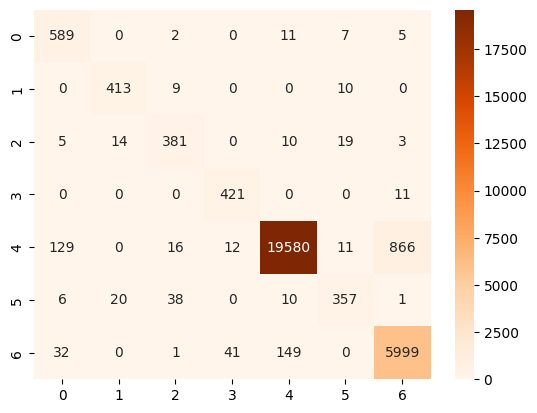

In [54]:
# Train KNN on resampled data
knn_model = KNeighborsClassifier(n_neighbors=5)  # you can adjust k
knn_model.fit(X_train_res, y_train_res)

# Predict
y_pred_knn = knn_model.predict(X_test)

# Evaluate
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# Confusion matrix visualization
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Oranges')
plt.show()


HYPER TUNING

Random Forest Accuracy: 0.9265542532044692

Classification Report:
                    precision    recall  f1-score   support

            Aspen       0.79      0.91      0.85       614
Cottonwood/Willow       0.94      0.95      0.95       432
      Douglas-fir       0.81      0.87      0.84       432
        Krummholz       0.93      0.96      0.95       432
   Lodgepole Pine       0.97      0.94      0.95     20614
   Ponderosa Pine       0.84      0.85      0.85       432
       Spruce/Fir       0.83      0.90      0.86      6222

         accuracy                           0.93     29178
        macro avg       0.87      0.91      0.89     29178
     weighted avg       0.93      0.93      0.93     29178



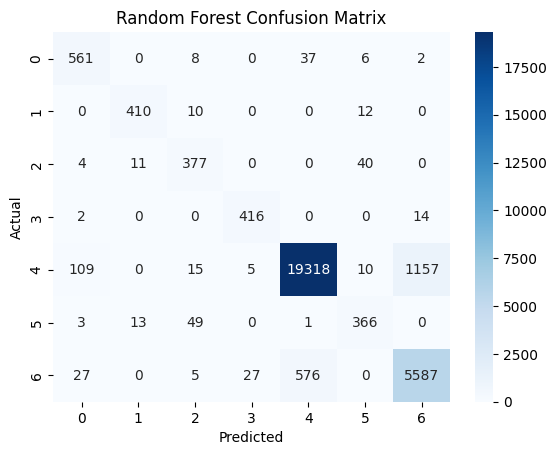

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Random Forest with safe default parameters
rf_model = RandomForestClassifier(
    n_estimators=100, 
    max_depth=20, 
    min_samples_split=2, 
    min_samples_leaf=1,
    bootstrap=True,
    random_state=42
)

# Train on full resampled training data
rf_model.fit(X_train_res, y_train_res)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


Checking best Model

In [65]:
from sklearn.metrics import accuracy_score

# Predictions from your models
preds = {
    "Decision Tree": y_pred_dt,
    "Logistic Regression": y_pred_lr,
    "KNN": y_pred_knn,
    "Random Forest": y_pred_rf
}

# Find best model
best_model = max(preds, key=lambda name: accuracy_score(y_test, preds[name]))
print("✅ Best-performing model:", best_model)
print("Accuracy:", accuracy_score(y_test, preds[best_model]))


✅ Best-performing model: KNN
Accuracy: 0.9507162930975392


In [69]:
# Train Random Forest with safe default parameters
rf_model = RandomForestClassifier(
    n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=1,
    bootstrap=True, random_state=42
)
rf_model.fit(X_train_res, y_train_res)

# Save the trained model
pickle.dump(rf_model, open('best_model.pkl', 'wb'))

In [70]:
best_model = pickle.load(open('best_model.pkl', 'rb'))
y_pred = best_model.predict(X_test)

In [71]:
# Load model and predict
best_model = pickle.load(open('best_model.pkl', 'rb'))
print("Accuracy:", accuracy_score(y_test, best_model.predict(X_test)))


Accuracy: 0.9265542532044692
